### Example 2
# Calculate finite temperature yield stress
**Author**: Gerard Paul Marcelo Leyson

**Date**: 2016-11-03

### Load modules

In [16]:
%matplotlib inline

import sys
sys.path.append('../module')

from __future__ import print_function
from __future__ import division

import labusch as lb
import numpy as np
import matplotlib.pyplot as plt

### Load Labusch parameters

In [17]:
lp_almg = lb.LabuschParameters()
lp_almn = lb.LabuschParameters()

lp_almg.load('./data/labusch_params_Al-Mg_elastic.npz')
lp_almn.load('./data/labusch_params_Al-Mn_elastic.npz')

### Define experimental parameters

In [24]:
conc = [0.01]
parameters = [lp_almg]
ep  = 1.e-4  # experimental strain rate
ep0 = 1.e5   # reference strain rate
Gamma = 0.47 # dislocation line tension
ssmodel_mg = lb.SoluteStrengtheningModel(parameters, conc, ep=ep, ep0=ep0, Gamma=Gamma)

### Predict finite temperature strengths

In [19]:
Tarray = np.linspace(0., 500.)
pred_full = ssmodel_mg.predict_strength(Tarray)          # full prediction (interpolated)
pred_lowT = ssmodel_mg.predict_strength_LT(Tarray)       # low temperature limit
pred_highT = ssmodel_mg.predict_strength_HT(Tarray)      # high temperature limit

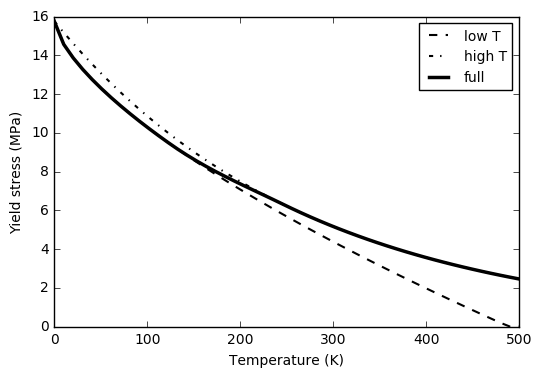

In [23]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.plot(Tarray, pred_lowT, '--k', lw=1.5, label='low T')
ax.plot(Tarray, pred_highT, '-.k', lw=1.5, label='high T')
ax.plot(Tarray, pred_full, '-k', lw=2.5, label='full')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Yield stress (MPa)')
ax.legend(loc=1, fontsize=10)

### Alloys with 2 or more solutes
You can easily take into account more than one element in the alloy with he module, as shown below

In [26]:
# Consider an alloy with 0.1% Mg and 0.1% Mn
conc = [0.001, 0.001]
parameters = [lp_almg, lp_almn]
ep  = 1.e-4  # experimental strain rate
ep0 = 1.e5   # reference strain rate
Gamma = 0.47 # dislocation line tension
ssmodel_mg_mn = lb.SoluteStrengtheningModel(parameters, conc, ep=ep, ep0=ep0, Gamma=Gamma)

In [27]:
Tarray = np.linspace(0., 500.)
pred_full = ssmodel_mg_mn.predict_strength(Tarray)          # full prediction (interpolated)
pred_lowT = ssmodel_mg_mn.predict_strength_LT(Tarray)       # low temperature limit
pred_highT = ssmodel_mg_mn.predict_strength_HT(Tarray)      # high temperature limit

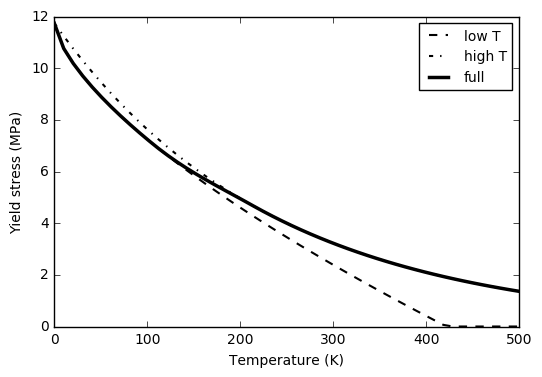

In [28]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.plot(Tarray, pred_lowT, '--k', lw=1.5, label='low T')
ax.plot(Tarray, pred_highT, '-.k', lw=1.5, label='high T')
ax.plot(Tarray, pred_full, '-k', lw=2.5, label='full')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Yield stress (MPa)')
ax.legend(loc=1, fontsize=10)

In [32]:
help(lb.SoluteStrengtheningModel)

Help on class SoluteStrengtheningModel in module labusch.solute_strengthening:

class SoluteStrengtheningModel(__builtin__.object)
 |  Class containing for predicting finite temperature yield strength.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parameters, conc, ep=0.0001, ep0=100000.0, Gamma=nan, ty_ath=0.0)
 |  
 |  fit_strength_full(self, taunorm_lim_lowT=0.6, taunorm_lim_highT=0.4, Tmax=2000.0, Tstep=1.0)
 |      Fits a univariate spline between the low and high temperature
 |      solutions.
 |      
 |      :params:
 |          taunorm_lim_lowT: use up to this value for (ty/ty0) using the low
 |                  temperature solution
 |          taunorm_lim_highT: start with this value for (ty/ty0) for the
 |                  high temperature solution
 |          Tmax: fit up to this temperature
 |          Tstep: step in temperature
 |  
 |  predict_strength(self, Tarray)
 |      Predict finte temperature yield strength using the interpolated
 |      solution.
 |  
 |